In [10]:
#下載中文字體
!pip install wget

import wget
wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf")

import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from matplotlib.font_manager import fontManager
from matplotlib import rcParams

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=6e015c6898095cfe121ceeb1aed66ef86a0b310352430e13815b09b666e89216
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [13]:
import pandas as pd

# read (我將放在github上並讀取 因為放在colab好像會消失)
file_path = "https://raw.githubusercontent.com/daniel88516/112---A1-A2-/main/112%E5%B9%B4-%E8%87%BA%E5%8C%97%E5%B8%82A1%E5%8F%8AA2%E9%A1%9E%E4%BA%A4%E9%80%9A%E4%BA%8B%E6%95%85%E6%98%8E%E7%B4%B0.csv"
ref_file_path = "https://github.com/Killer66562/accident/raw/refs/heads/main/%E4%BA%A4%E9%80%9A%E4%BA%8B%E6%95%85%E4%BB%A3%E7%A2%BC%E5%B0%8D%E7%85%A7%E8%A1%A8.csv"
#ref_file_path = 'https://github.com/DieWay0123/ML-accident/raw/refs/heads/master/%E4%BA%A4%E9%80%9A%E4%BA%8B%E6%95%85%E4%BB%A3%E7%A2%BC%E5%B0%8D%E7%85%A7%E8%A1%A8.csv'

data = pd.read_csv(file_path, encoding='big5', low_memory=False, dtype=str)
ref = pd.read_csv(ref_file_path, encoding='big5', low_memory=False, dtype=str)



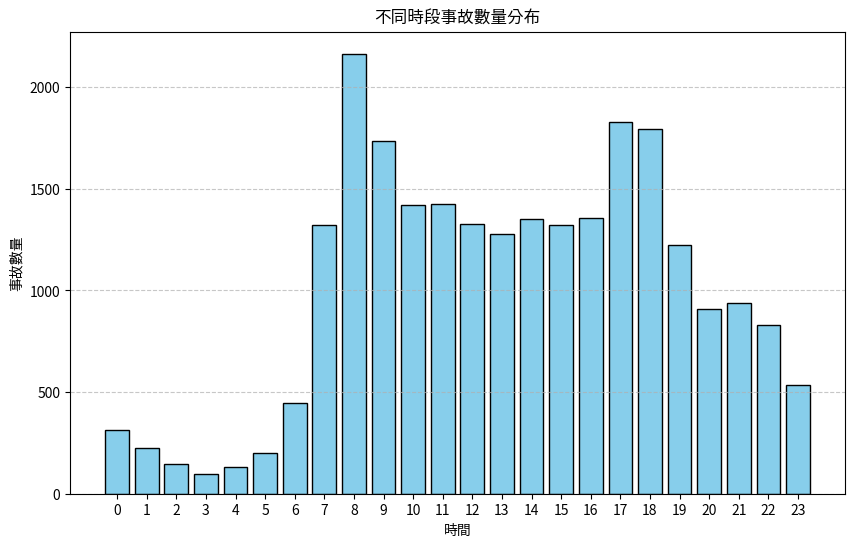

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(file_path, encoding='big5', low_memory=False, dtype=str)
ref = pd.read_csv(ref_file_path, encoding='big5', low_memory=False, dtype=str)

# 把同一事件的紀錄去重
unique_case_data = data.drop_duplicates(subset=['發生月', '發生日', '發生時-Hours', '發生分', '肇事地點'])

# 事故時間分布(我把資料換成去重過的喔)
unique_case_data.loc[:, '發生時-Hours'] = pd.to_numeric(unique_case_data['發生時-Hours'], errors='coerce')#將data['發生時-Hours']欄位轉為數字。
hourly_data = unique_case_data['發生時-Hours'].value_counts() #計算事故數量per hour

# 繪製事故時間分布圖
plt.figure(figsize=(10, 6))
plt.bar(hourly_data.index, hourly_data.values, color='skyblue', edgecolor='black')
plt.xlabel('時間')
plt.ylabel('事故數量')
plt.title('不同時段事故數量分布')
plt.xticks(range(0, 24),)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

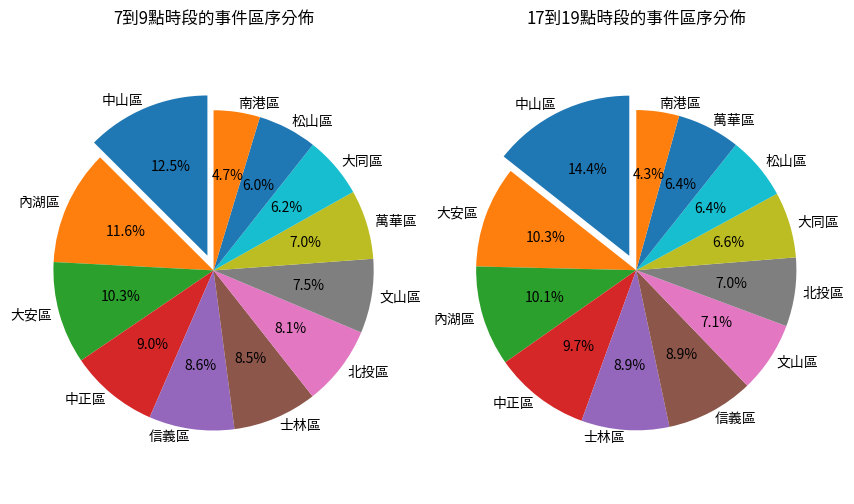

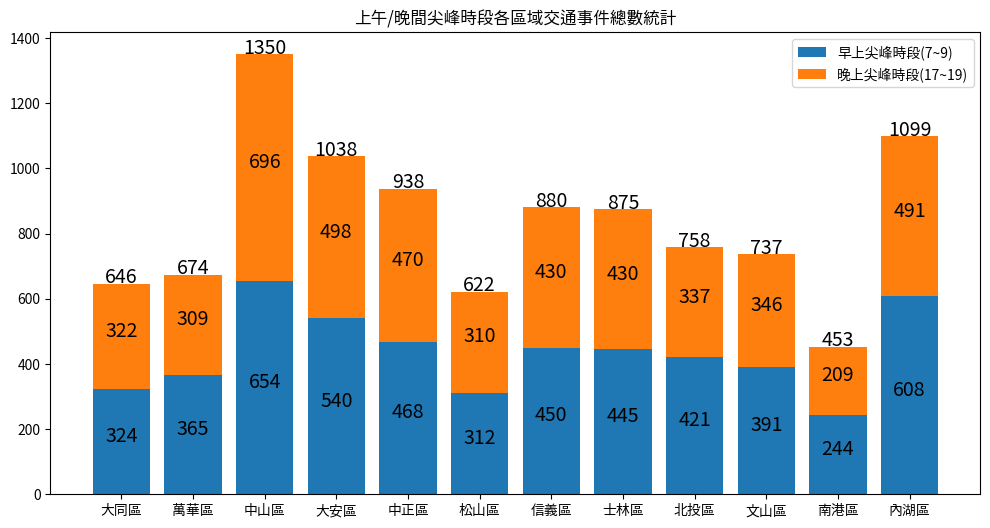

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

# 把同一事件的紀錄去重
unique_case_data = data.drop_duplicates(subset=['發生月', '發生日', '發生時-Hours', '發生分', '肇事地點'])

unique_case_data.loc[:, '發生時-Hours'] = pd.to_numeric(unique_case_data['發生時-Hours'], errors='coerce')
area_morning_rushHour_data = unique_case_data[(unique_case_data['發生時-Hours'] >= 7) & (unique_case_data['發生時-Hours'] <= 9)]
area_count_morning =  area_morning_rushHour_data['區序'].value_counts()

area_night_rushHour_data = unique_case_data[(unique_case_data['發生時-Hours'] >= 17) & (unique_case_data['發生時-Hours'] <= 19)]
area_count_night =  area_night_rushHour_data['區序'].value_counts()

area_count_total = area_count_morning.add(area_count_night)

area_label_morning = [s[2:] for s in area_count_morning.index.values]
area_label_night = [s[2:] for s in area_count_night.index.values]

explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(121)
ax1.pie(area_count_morning.sort_values(ascending=False), labels=area_label_morning, autopct='%1.1f%%', startangle=90, labeldistance=1.05, explode=explode)
ax1.set_title('7到9點時段的事件區序分佈')
ax1.set_ylabel('')
ax1.axis('equal')

ax2 = fig.add_subplot(122)
ax2.pie(area_count_night.sort_values(ascending=False), labels=area_label_night, autopct='%1.1f%%', startangle=90, labeldistance=1.05, explode=explode)
ax2.set_title('17到19點時段的事件區序分佈')
ax2.set_ylabel('')
ax2.axis('equal')

# 長條圖展示以index_sort為主(以total為主的話不能代表該區早上和晚上都是最多，用index_sort才能不使資料對錯)
area_count_morning = area_count_morning.sort_index()
area_count_night = area_count_night.sort_index()
area_count_total = area_count_total.sort_index()
area_label_total = [s[2:] for s in area_count_total.index.values]

plt.figure(figsize=(12, 6))
plt.title("上午/晚間尖峰時段各區域交通事件總數統計")
plt.bar(area_label_total, area_count_morning, label='早上尖峰時段(7~9)')
plt.bar(area_label_total, area_count_night, bottom=area_count_morning, label='晚上尖峰時段(17~19)')

for i in range(len(area_count_night)):
  plt.text(i, area_count_morning.iloc[i]/2-0.5, area_count_morning.iloc[i], fontsize=14, horizontalalignment='center')
  plt.text(i, area_count_night.iloc[i]/2 + area_count_morning.iloc[i] -0.5, area_count_night.iloc[i], fontsize=14, horizontalalignment='center')
  plt.text(i, area_count_total.iloc[i] + 1.5, area_count_total.iloc[i], fontsize=14, horizontalalignment='center')
plt.legend()

plt.show()

In [ ]:
BG_IMG_PATH = 'https://scontent.ftpe13-1.fna.fbcdn.net/v/t39.30808-6/464596340_9365051200176591_7816667832381921933_n.jpg?_nc_cat=100&ccb=1-7&_nc_sid=2285d6&_nc_ohc=Gkg0s93ioGsQ7kNvgGGHXBK&_nc_zt=23&_nc_ht=scontent.ftpe13-1.fna&_nc_gid=AWkgM5w0A7gvhfCiv2dhx_y&oh=00_AYC_z7zImh148IZhmFT_v34jZPCQ2P1MW6mA0keIq5IL_Q&oe=67420A5F'

121.5189411 121.5718894 25.04466143 25.09125008


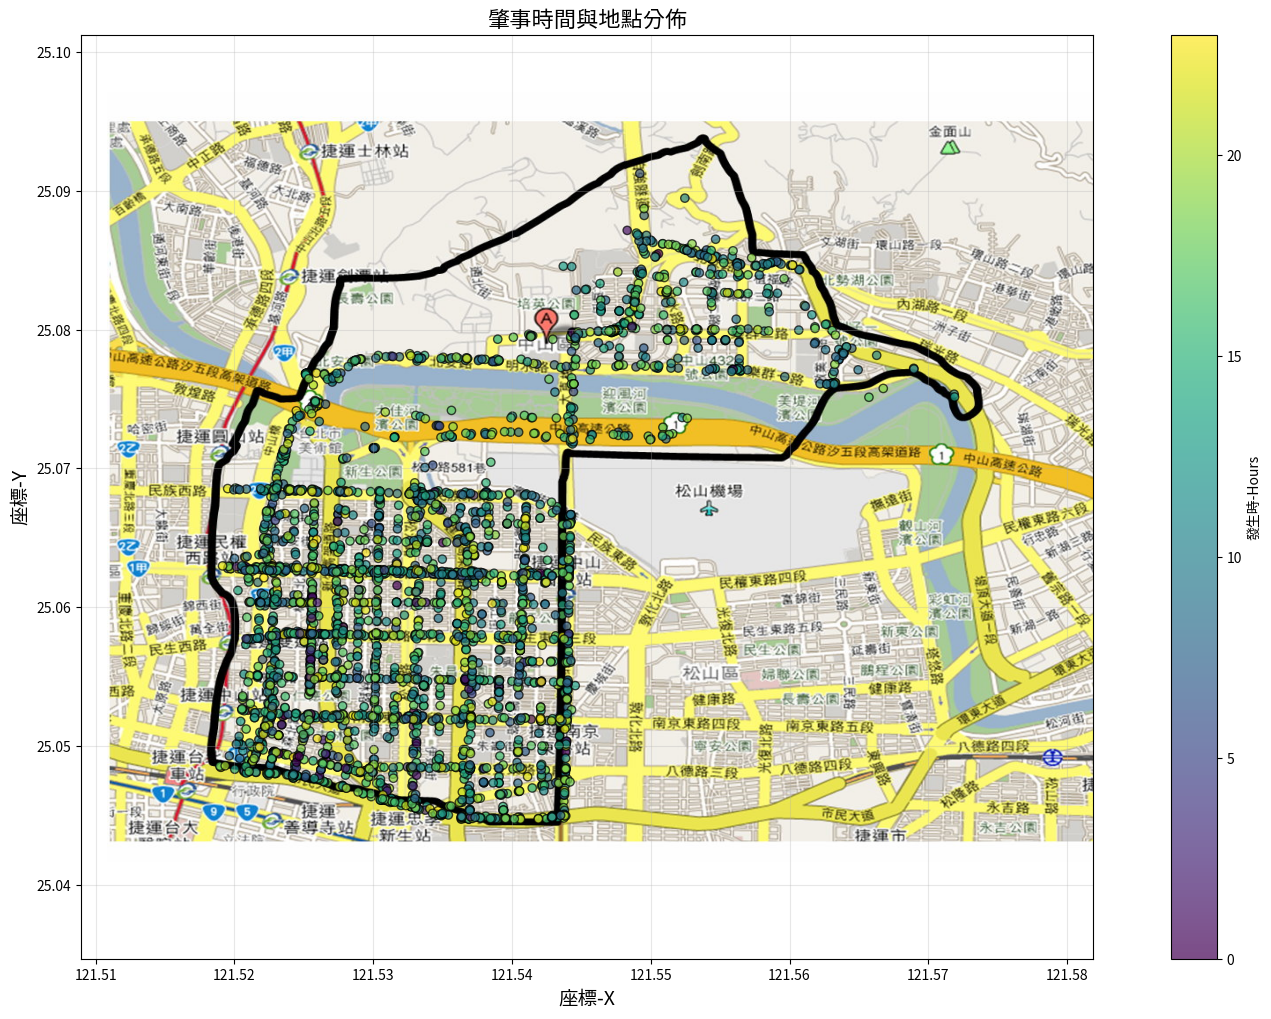

In [ ]:
from matplotlib import ticker as mtick
# 進一步去看中山區哪個區域分布最多車禍
zhongshan_area_data = unique_case_data[unique_case_data['區序'] == '03中山區']
#資料勘正
zhongshan_area_data.at[38883, '座標-X'] = str(121.5421)
zhongshan_area_data.at[38883, '座標-Y'] = str(25.0518)

#調整資料
scatter_data = zhongshan_area_data.dropna(subset=['座標-X', '座標-Y'])
scatter_data.loc[:, '發生時-Hours'] = scatter_data['發生時-Hours'].astype(int)  # 確保時間為整數
scatter_data.loc[:, '座標-X'] = scatter_data['座標-X'].astype(float)
scatter_data.loc[:, '座標-Y'] = scatter_data['座標-Y'].astype(float)

#獲取座標極值以利後續調整地圖
minx = scatter_data.loc[:, '座標-X'].min()
maxx = scatter_data.loc[:, '座標-X'].max()
miny = scatter_data.loc[:, '座標-Y'].min()
maxy = scatter_data.loc[:, '座標-Y'].max()
print(f"{minx} {maxx} {miny} {maxy}")

wget.download(BG_IMG_PATH, './zhongsan.jpg')
img= plt.imread('./zhongsan.jpg')
fig, ax = plt.subplots()
ax.imshow(img, extent=[minx-0.00453+(-0.0036), maxx-0.00453+(0.018), miny-0.00203+(-0.001), maxy-0.00203+(0.0079)])   #設定背景圖片並調整位置及比例尺
ax.figure.set_size_inches(20, 12)
scatter = plt.scatter(
    scatter_data['座標-X'], scatter_data['座標-Y'],
    c=scatter_data['發生時-Hours'], cmap='viridis', alpha=0.7, edgecolors='k'
)

#設定x, y軸顯示至小數點後2位
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# 繪製散點圖
plt.colorbar(scatter, label='發生時-Hours')  #點的顏色代表時間
plt.title('肇事時間與地點分佈', fontsize=16)
plt.xlabel('座標-X', fontsize=14)
plt.ylabel('座標-Y', fontsize=14)
plt.xlim(minx-0.01, maxx+0.01)
plt.ylim(miny-0.01, maxy+0.01)
plt.grid(alpha=0.3)
plt.show()

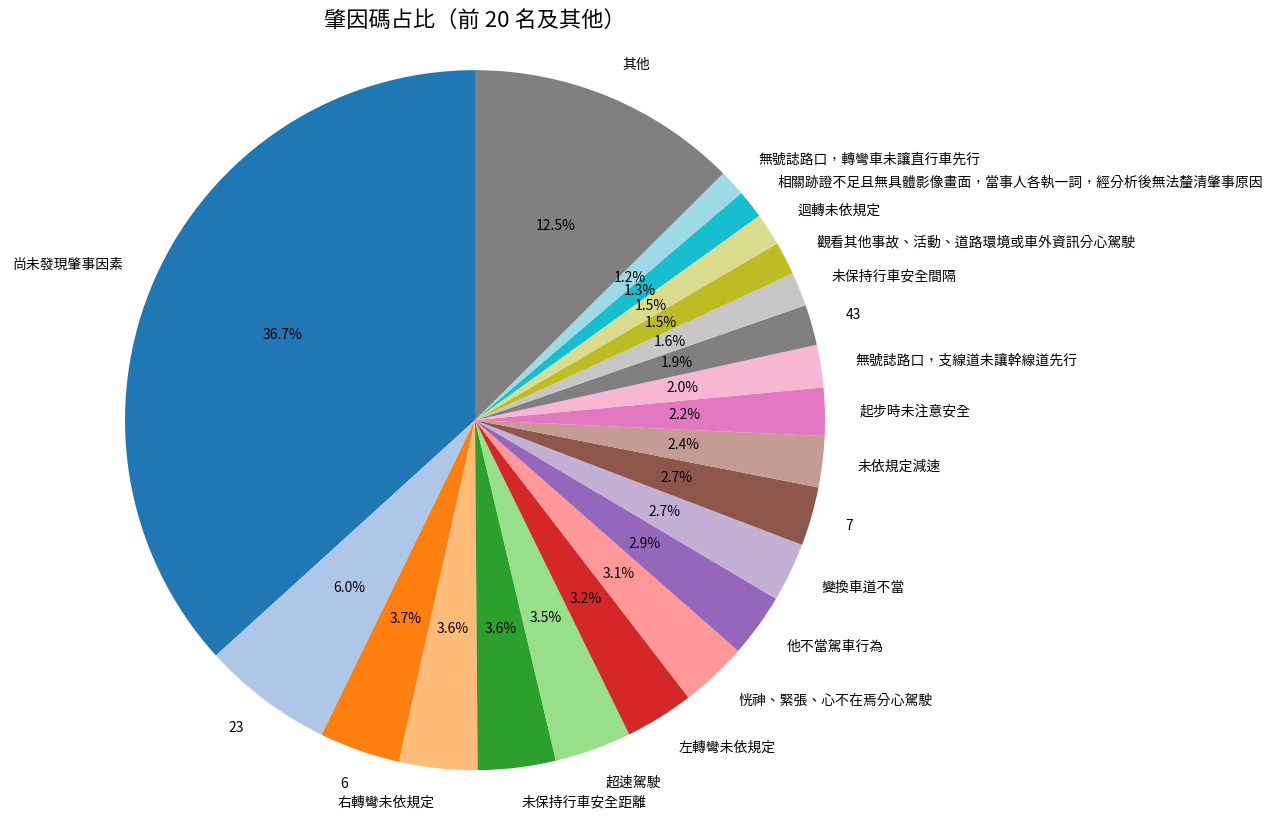

In [14]:
# 計算肇因碼占比
cause_data = data['肇因碼-個別'].dropna().astype(int).astype(str) \
.replace(ref.where(ref['欄位名稱'] == '肇因碼') \
.set_index('代碼')['對應項目']).value_counts()  # 統計各肇因碼次數

# 合併前20名以外的數據為 "其他"
top_20 = cause_data.head(20)  # 取前 20 名
others = cause_data.iloc[20:].sum()  # 計算其他所有的次數
cause_data_combined = pd.concat([top_20, pd.Series({'其他': others})])  # 使用 pd.concat 合併 "其他"

# 定義顏色（確保 "其他" 顏色不同）
colors = plt.cm.tab20.colors[:20] + ((0.5, 0.5, 0.5),)  # 前 20 名使用 tab20，"其他" 使用灰色

# 繪製圓餅圖
plt.figure(figsize=(12, 10))
plt.pie(
    cause_data_combined,  # 前 20 名及 "其他" 的數據
    labels=cause_data_combined.index,  # 使用肇因碼及 "其他" 作為標籤
    autopct='%1.1f%%',  # 百分比格式
    startangle=90,  # 從頂部開始繪製
    textprops={'fontsize': 10},  # 設定文字大小
    colors=colors  # 手動指定顏色
)
plt.title('肇因碼占比（前 20 名及其他）', fontsize=16)
plt.axis('equal')  # 確保圓形
plt.show()

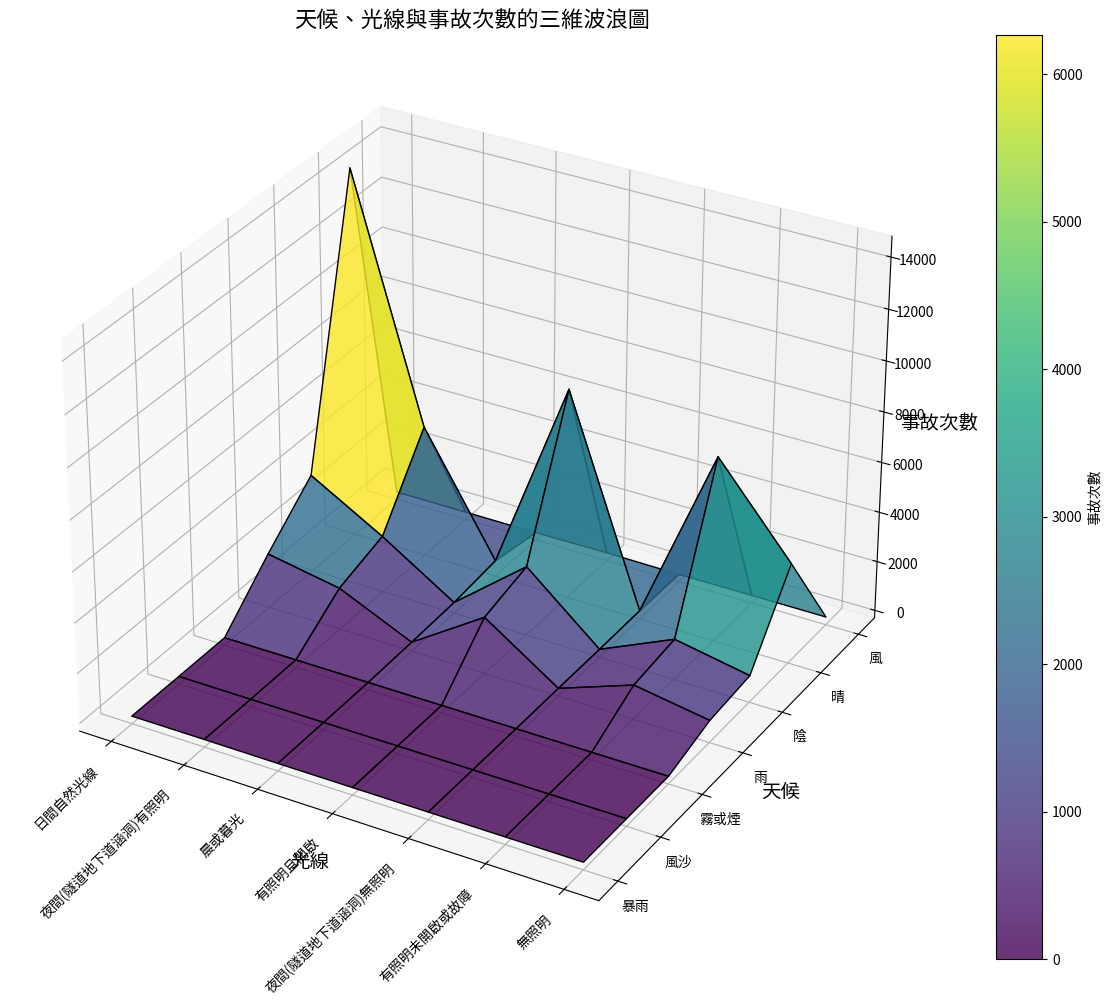

In [ ]:
#可以看到 天候越差 光線越暗 事故次數越多

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
# 篩選需要的欄位：天候、光線
wave_data = data[['天候', '光線']].dropna()  # 移除空值

# 計算每組天候與光線的事故次數
wave_data['事故次數'] = 1
grouped_data = wave_data.groupby(['天候', '光線']).count().reset_index()

# 創建三維數據網格
天候_labels = grouped_data['天候'].unique()
光線_labels = grouped_data['光線'].unique()

天候_idx = {label: idx for idx, label in enumerate(天候_labels)}
光線_idx = {label: idx for idx, label in enumerate(光線_labels)}

X, Y = np.meshgrid(
    np.arange(len(光線_labels)), np.arange(len(天候_labels))
)
Z = np.zeros_like(X, dtype=float)

for _, row in grouped_data.iterrows():
    天候_index = 天候_idx[row['天候']]
    光線_index = 光線_idx[row['光線']]
    Z[天候_index, 光線_index] = row['事故次數']

天候_labels = grouped_data['天候'].astype(int).astype(str).replace(ref.where(ref["欄位名稱"] == "天候").set_index("代碼")["對應項目"]).unique()
光線_labels = grouped_data['光線'].astype(int).astype(str).replace(ref.where(ref["欄位名稱"] == "光線").set_index("代碼")["對應項目"]).unique()

# 繪製
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(
    X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.8
)

# 顏色條，軸標籤
plt.colorbar(surf, label='事故次數')
ax.set_xticks(np.arange(len(光線_labels)))
ax.set_xticklabels(光線_labels, rotation=45, ha='right', fontsize=10)
ax.set_yticks(np.arange(len(天候_labels)))
ax.set_yticklabels(天候_labels, fontsize=10)
ax.set_title('天候、光線與事故次數的三維波浪圖', fontsize=16)
ax.set_xlabel('光線', fontsize=14)
ax.set_ylabel('天候', fontsize=14)
ax.set_zlabel('事故次數', fontsize=14)

plt.show()

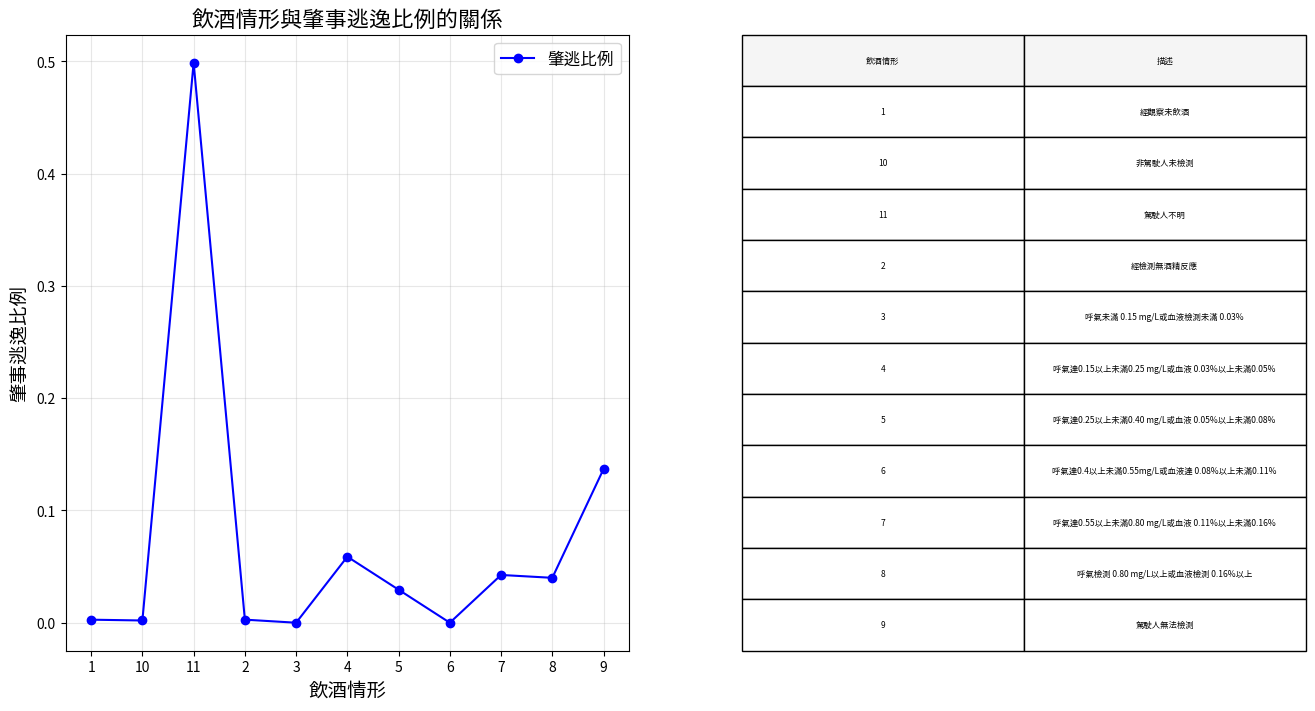

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 重新根據 '飲酒情形' 計算 '個人肇逃否' 的平均值
sit = {"1":"經觀察未飲酒",
  "2":"經檢測無酒精反應",
  "3":"呼氣未滿 0.15 mg/L或血液檢測未滿 0.03%",
  "4":"呼氣達0.15以上未滿0.25 mg/L或血液 0.03%以上未滿0.05%",
  "5":"呼氣達0.25以上未滿0.40 mg/L或血液 0.05%以上未滿0.08%",
  "6":"呼氣達0.4以上未滿0.55mg/L或血液達 0.08%以上未滿0.11%",
  "7":"呼氣達0.55以上未滿0.80 mg/L或血液 0.11%以上未滿0.16%",
  "8":"呼氣檢測 0.80 mg/L以上或血液檢測 0.16%以上",
  "9":"駕駛人無法檢測",
  "10":"非駕駛人未檢測",
  "11":"駕駛人不明"
}
data2 = pd.read_csv(file_path, encoding='big5', low_memory=False, dtype=str)
# print(data)
data2['飲酒情形'] = data2['飲酒情形'].replace({'06': '6', '09': '9'})
data2['個人肇逃否'] = data2['個人肇逃否'].map({'1': 0, '2': 1})

curve_data = data2.groupby('飲酒情形')['個人肇逃否'].mean()
# 顯示計算後的結果，檢查是否正確
# print(curve_data.get_group("3"))
# print(curve_data)

sit_df = pd.DataFrame(list(sit.items()), columns=['飲酒情形', '描述'])
curve_data = curve_data.reset_index()
merged_data = pd.merge(curve_data, sit_df, on='飲酒情形', how='left')

# ---------------------------- 繪製肇逃比例曲線圖 ----------------------------
plt.figure(figsize=(12, 6))
plt.plot(
    curve_data['飲酒情形'], curve_data['個人肇逃否'],
    marker='o', linestyle='-', color='blue', label='肇逃比例'
)
plt.title('飲酒情形與肇事逃逸比例的關係', fontsize=16)
plt.xlabel('飲酒情形', fontsize=14)
plt.ylabel('肇事逃逸比例', fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)

# 顯示肇逃比例圖
plt.show()

# ---------------------------- 繪製飲酒情形與描述對照表 ----------------------------
plt.figure(figsize=(6, 4))  # 重新設置圖表大小
plt.axis('off')  # 使圖表無邊框
# 在這裡繪製對照表，使用 plt.table() 函數來顯示對照表格
plt.table(cellText=merged_data[['飲酒情形', '描述']].values,
          colLabels=['飲酒情形', '描述'],
          loc='center',
          colColours=['#f5f5f5', '#f5f5f5'],
          cellLoc='center',
          bbox=[0, 0, 1, 1])  # 將表格顯示在圖的中央

# 顯示飲酒情形與描述對照表
plt.show()

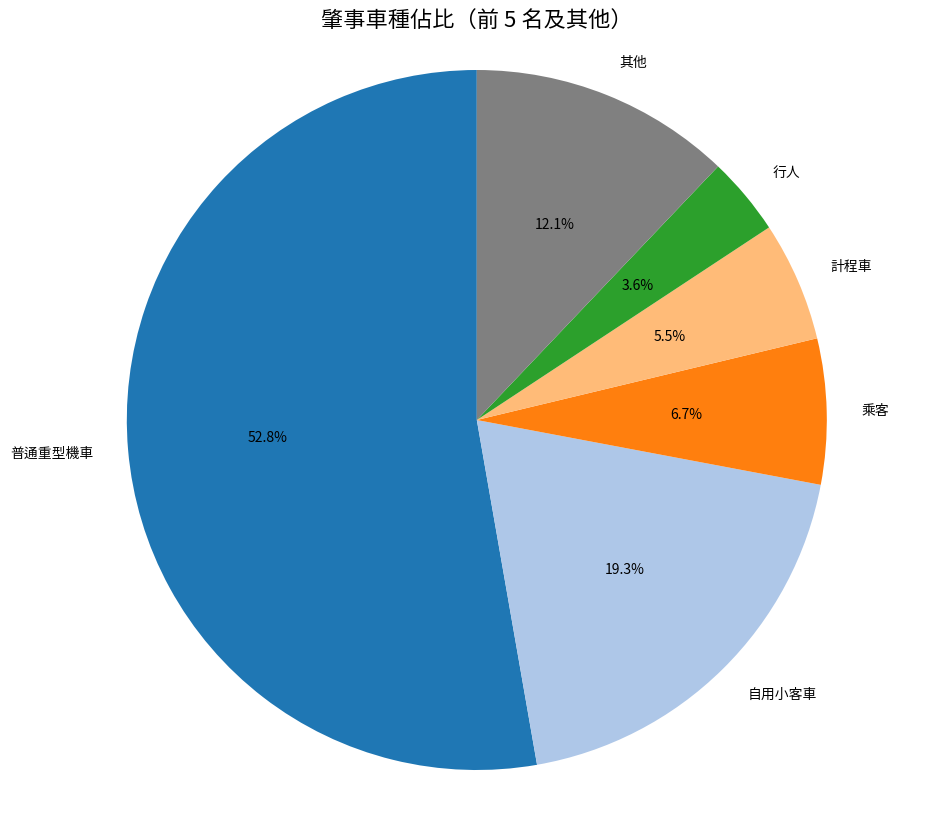

In [ ]:
#肇事車種比例
car_data = data["車種"].dropna().replace(ref.where(ref['欄位名稱'] == '車種').set_index('代碼')['對應項目']).value_counts().sort_values(ascending=False)

n = 5
car_data_topn = car_data.head(n)
car_data_others = car_data.iloc[n:].sum()
car_data_combined = pd.concat([car_data_topn, pd.Series({'其他': car_data_others})])

colors = plt.cm.tab20.colors[:n] + ((0.5, 0.5, 0.5),)  # 前 n 名使用 tab20，"其他" 使用灰色

# 繪製圓餅圖
plt.figure(figsize=(12, 10))
plt.pie(
    car_data_combined,  # 前 n 名及 "其他" 的數據
    labels=car_data_combined.index,  # 使用肇因碼及 "其他" 作為標籤
    autopct='%1.1f%%',  # 百分比格式
    startangle=90,  # 從頂部開始繪製
    textprops={'fontsize': 10},  # 設定文字大小
    colors=colors  # 手動指定顏色
)
plt.title(f'肇事車種佔比（前 {n} 名及其他）', fontsize=16)
plt.axis('equal')  # 確保圓形
plt.show()

#為什麼行人算車種???

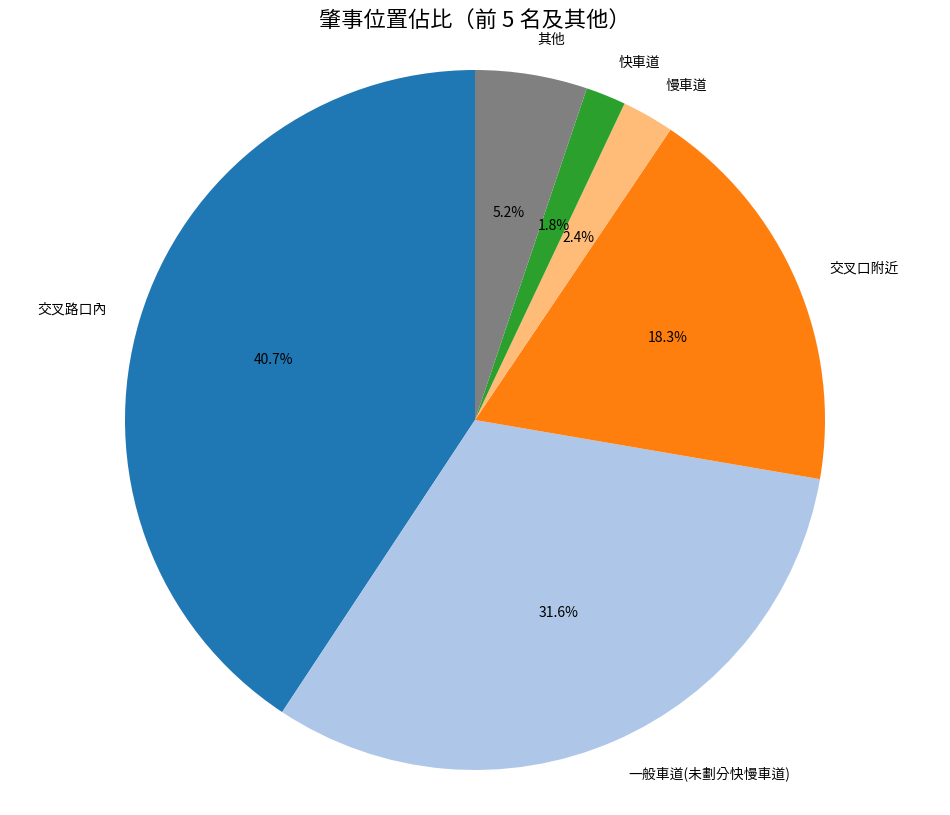

In [ ]:
#事故位置比例
accident_loc_data = data["事故位置"].dropna().astype(int).astype(str) \
.replace(ref.where(ref['欄位名稱'] == "事故位置").set_index('代碼')['對應項目']) \
.value_counts().sort_values(ascending=False)

n = 5
accident_loc_data_topn = accident_loc_data.head(n)
accident_loc_data_others = accident_loc_data.iloc[n:].sum()
accident_loc_data_combined = pd.concat([accident_loc_data_topn, pd.Series({'其他': accident_loc_data_others})])

colors = plt.cm.tab20.colors[:n] + ((0.5, 0.5, 0.5), )  # 前 n 名使用 tab20，"其他" 使用灰色

# 繪製圓餅圖
plt.figure(figsize=(12, 10))
plt.pie(
    accident_loc_data_combined,  # 前 n 名及 "其他" 的數據
    labels=accident_loc_data_combined.index,  # 使用事故位置及 "其他" 作為標籤
    autopct='%1.1f%%',  # 百分比格式
    startangle=90,  # 從頂部開始繪製
    textprops={'fontsize': 10},  # 設定文字大小
    colors=colors  # 手動指定顏色
)
plt.title(f'肇事位置佔比（前 {n} 名及其他）', fontsize=16)
plt.axis('equal')  # 確保圓形
plt.show()

#路口才是事故的主要發生區

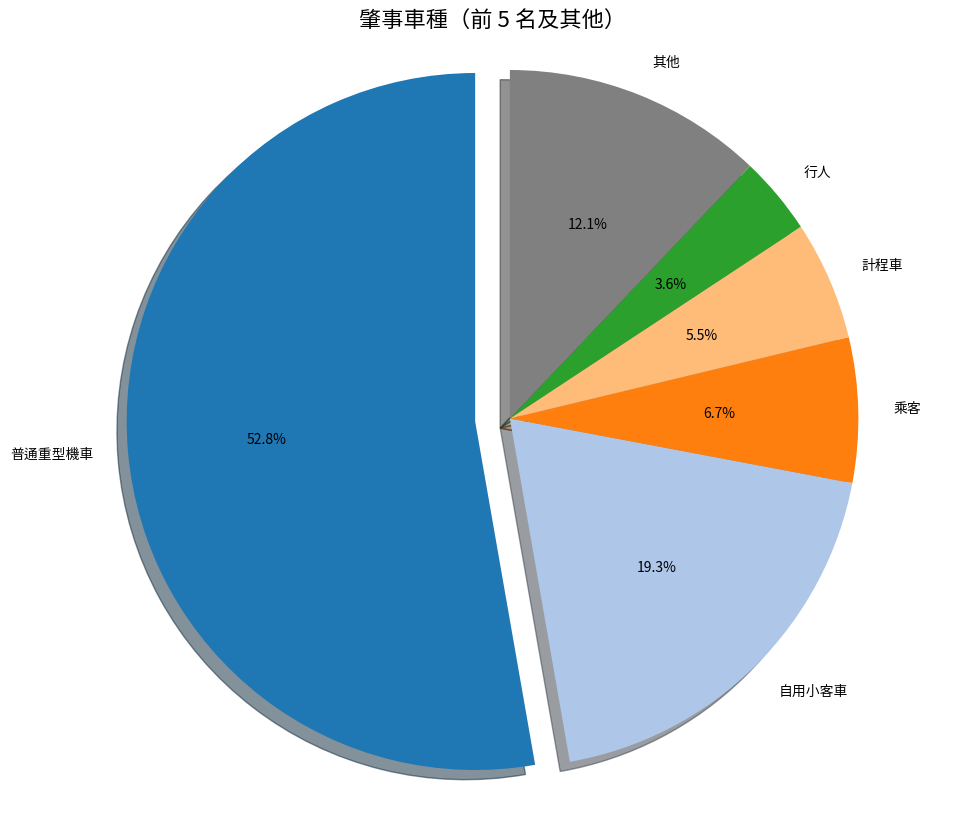

In [ ]:
#肇事車種比例
accident_car_data = data["車種"].dropna().astype(str) \
.replace(ref.where(ref['欄位名稱'] == "車種").set_index('代碼')['對應項目']) \
.value_counts().sort_values(ascending=False)

n = 5
accident_car_data_topn = accident_car_data.head(n)
accident_car_data_others = accident_car_data.iloc[n:].sum()
accident_car_data_combined = pd.concat([accident_car_data_topn, pd.Series({'其他': accident_car_data_others})])

# print(accident_loc_data_combined)
colors = plt.cm.tab20.colors[:n] + ((0.5, 0.5, 0.5), )  # 前 n 名使用 tab20，"其他" 使用灰色

explode = (0.1, 0, 0, 0, 0, 0) # 凸顯第一名
# 繪製圓餅圖
plt.figure(figsize=(12, 10))
plt.pie(
    accident_car_data_combined,  # 前 n 名及 "其他" 的數據
    labels=accident_car_data_combined.index,  # 使用事故位置及 "其他" 作為標籤
    autopct='%1.1f%%',  # 百分比格式
    startangle=90,  # 從頂部開始繪製
    textprops={'fontsize': 10},  # 設定文字大小
    colors=colors,  # 手動指定顏色
    explode=explode,  # 凸顯
    shadow=True   # 陰影
)
plt.title(f'肇事車種（前 {n} 名及其他）', fontsize=16)
plt.axis('equal')  # 確保圓形
plt.show()

# 機車最容易出事

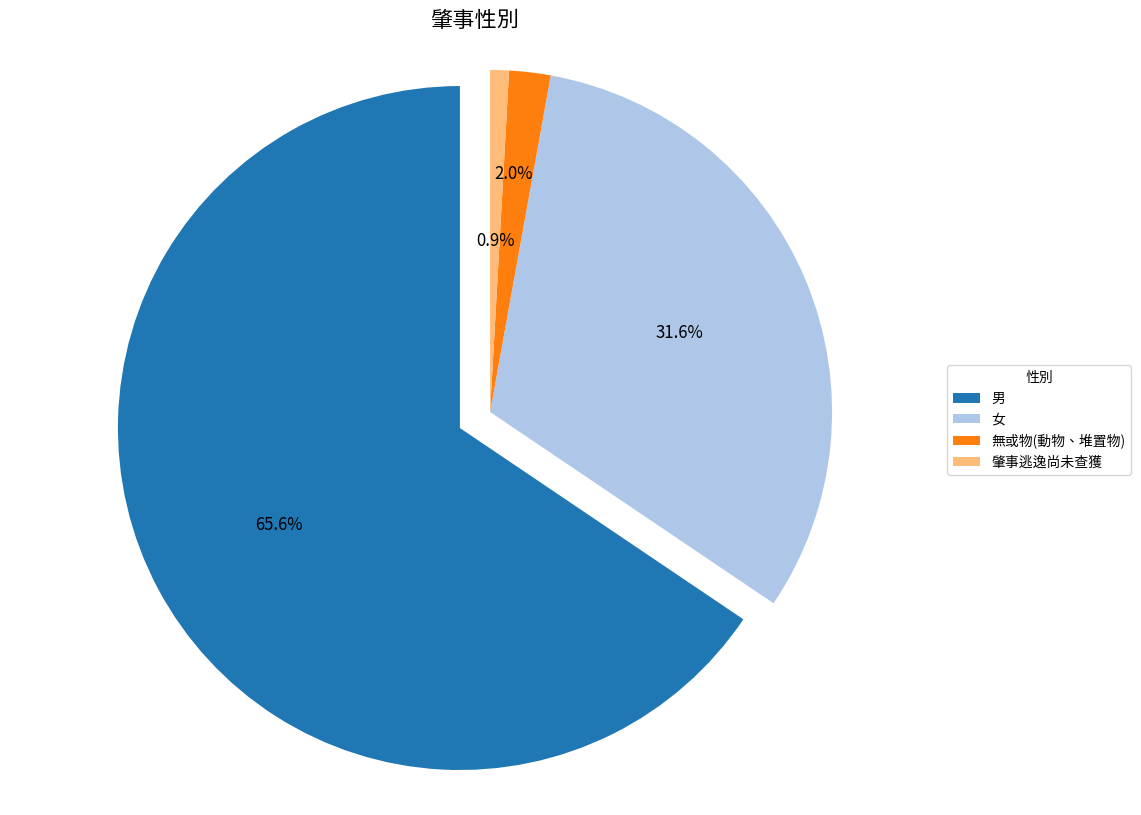

In [ ]:
#性別比例
accident_gender_data = data["性別"].dropna().astype(str) \
.replace(ref.where(ref['欄位名稱'] == "性別").set_index('代碼')['對應項目']) \
.value_counts().sort_values(ascending=False)

def my_autopct(pct):
  return ('%.1f%%' % pct) if pct > 10 else ''  # 只顯示百分比大於 10% 的數據

explode = (0.1, 0, 0, 0) # 凸顯第一名
# 繪製圓餅圖
plt.figure(figsize=(12, 10))
wedges, texts, autotexts = plt.pie(
    accident_gender_data,  # 前 n 名及 "其他" 的數據
    # labels=accident_gender_data.index,  # 使用事故位置及 "其他" 作為標籤
    autopct='%1.1f%%',  # 百分比格式
    startangle=90,  # 從頂部開始繪製
    textprops={'fontsize': 12},  # 設定文字大小
    colors=colors,  # 手動指定顏色
    explode=explode,  # 凸顯
    shadow=False   # 陰影
)
for i, a in enumerate(autotexts):
  if i == 2:  # 第三個百分比標籤
    a.set_position((a.get_position()[0], a.get_position()[1] + 0.1))  # 向上移動
  elif i == 3:  # 第四個百分比標籤
    a.set_position((a.get_position()[0], a.get_position()[1] - 0.1))  # 向下移動
plt.legend(wedges, accident_gender_data.index,
           title="性別",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))
plt.title(f'肇事性別', fontsize=16)
plt.axis('equal')  # 確保圓形
plt.show()

# 男性最容易出事

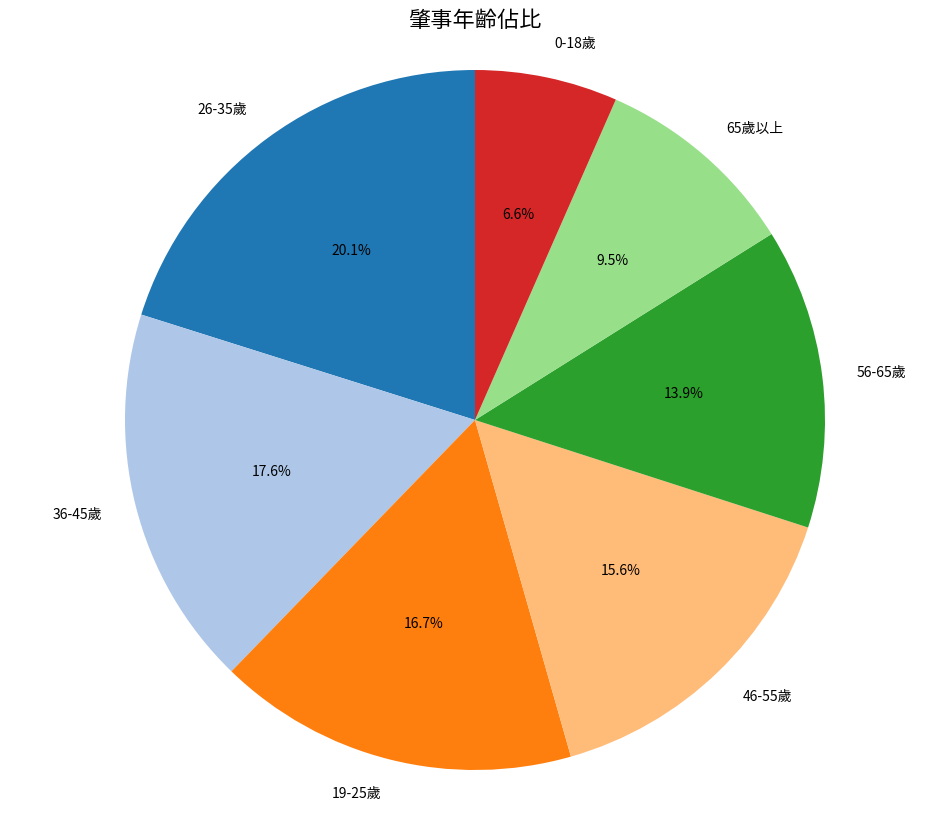

In [ ]:
#年齡比例
#笑死沒想到0到18還這麼多
n = 7 # 七種年齡層
age_intervals = {
    '0-18歲': list(range(0, 19)),
    '19-25歲': list(range(19, 26)),
    '26-35歲': list(range(26, 36)),
    '36-45歲': list(range(36, 46)),
    '46-55歲': list(range(46, 56)),
    '56-65歲': list(range(56, 66)),
    '65歲以上': list(range(66, 112))  # 最大到111欸真假
}
replace_dict = {}
for label, ages in age_intervals.items():
    for age in ages:
        replace_dict[str(age)] = label
accident_age_data = data["年齡"].dropna().astype(str) \
    .replace(replace_dict) \
    .value_counts().sort_values(ascending=False)

# print(accident_age_data)
colors = plt.cm.tab20.colors[:n] + ((0.5, 0.5, 0.5), )
plt.figure(figsize=(12, 10))
plt.pie(
    accident_age_data,  # 前 n 名及 "其他" 的數據
    labels=accident_age_data.index,  # 使用事故位置及 "其他" 作為標籤
    autopct='%1.1f%%',  # 百分比格式
    startangle=90,  # 從頂部開始繪製
    textprops={'fontsize': 10},  # 設定文字大小
    colors=colors  # 手動指定顏色
)
plt.title(f'肇事年齡佔比', fontsize=16)
plt.axis('equal')  # 確保圓形
plt.show()


<ipython-input-4-5f0cebc3c45f>:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, accident_age_data_man[i]/2, accident_age_data_man[i], fontsize=12, horizontalalignment='center')
<ipython-input-4-5f0cebc3c45f>:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, accident_age_data_man[i] + accident_age_data_woman[i]/2, accident_age_data_woman[i], fontsize=12, horizontalalignment='center')


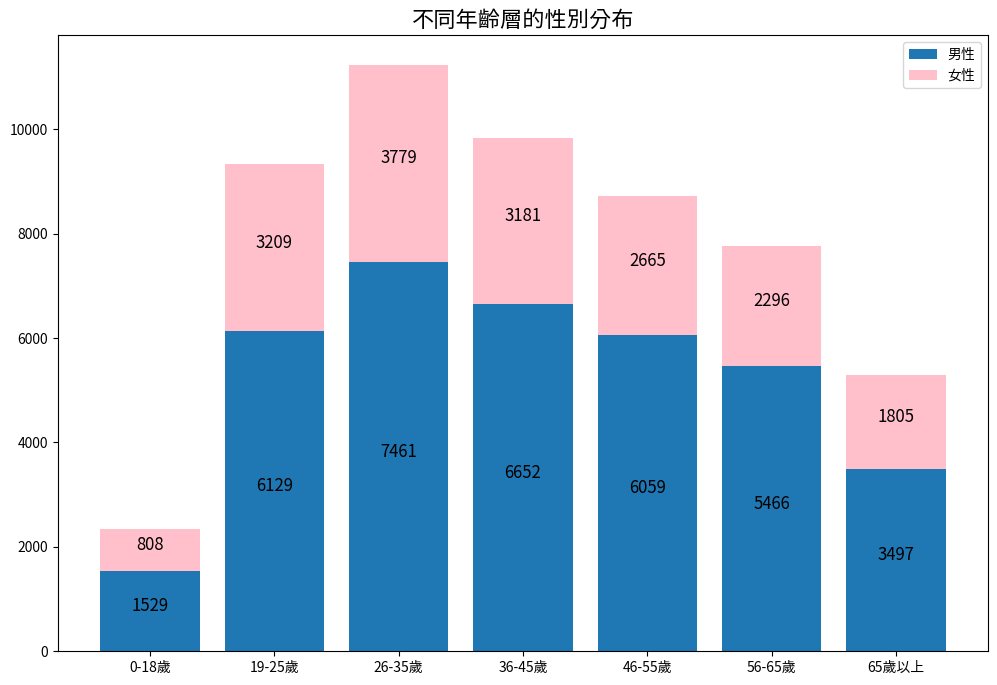

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


#年齡比例
n = 7 # 七種年齡層
age_intervals = {
    '0-18歲': list(range(0, 19)),
    '19-25歲': list(range(19, 26)),
    '26-35歲': list(range(26, 36)),
    '36-45歲': list(range(36, 46)),
    '46-55歲': list(range(46, 56)),
    '56-65歲': list(range(56, 66)),
    '65歲以上': list(range(66, 112))  # 最大到111欸真假
}
replace_dict = {}
for label, ages in age_intervals.items():
    for age in ages:
        replace_dict[str(age)] = label

# 男性和女性的年齡分布
accident_age_data_man = data[data["性別"] == '1']["年齡"].dropna().astype(str).replace(replace_dict).value_counts()
accident_age_data_woman = data[data["性別"] == '2']["年齡"].dropna().astype(str).replace(replace_dict).value_counts()
accident_age_data_man = accident_age_data_man.sort_index()
accident_age_data_woman = accident_age_data_woman.sort_index()
# print(accident_age_data_man)
# print(accident_age_data_woman)
# 定義年齡區間
age_labels = list(age_intervals.keys())

# 確保每個年齡區間都有數據，並且缺失的填補為0
accident_age_data_man = accident_age_data_man.reindex(age_labels, fill_value=0)
accident_age_data_woman = accident_age_data_woman.reindex(age_labels, fill_value=0)

# 繪製堆疊長條圖
plt.figure(figsize=(12, 8))
plt.title('不同年齡層的性別分布', fontsize=16)

# 繪製男性的條形圖
plt.bar(age_labels, accident_age_data_man, label='男性')

# 繪製女性的條形圖，堆疊在男性的上方
plt.bar(age_labels, accident_age_data_woman, bottom=accident_age_data_man, label='女性', color='pink')

# 標註數字
for i in range(len(age_labels)):
    plt.text(i, accident_age_data_man[i]/2, accident_age_data_man[i], fontsize=12, horizontalalignment='center')
    plt.text(i, accident_age_data_man[i] + accident_age_data_woman[i]/2, accident_age_data_woman[i], fontsize=12, horizontalalignment='center')

plt.legend()
plt.show()

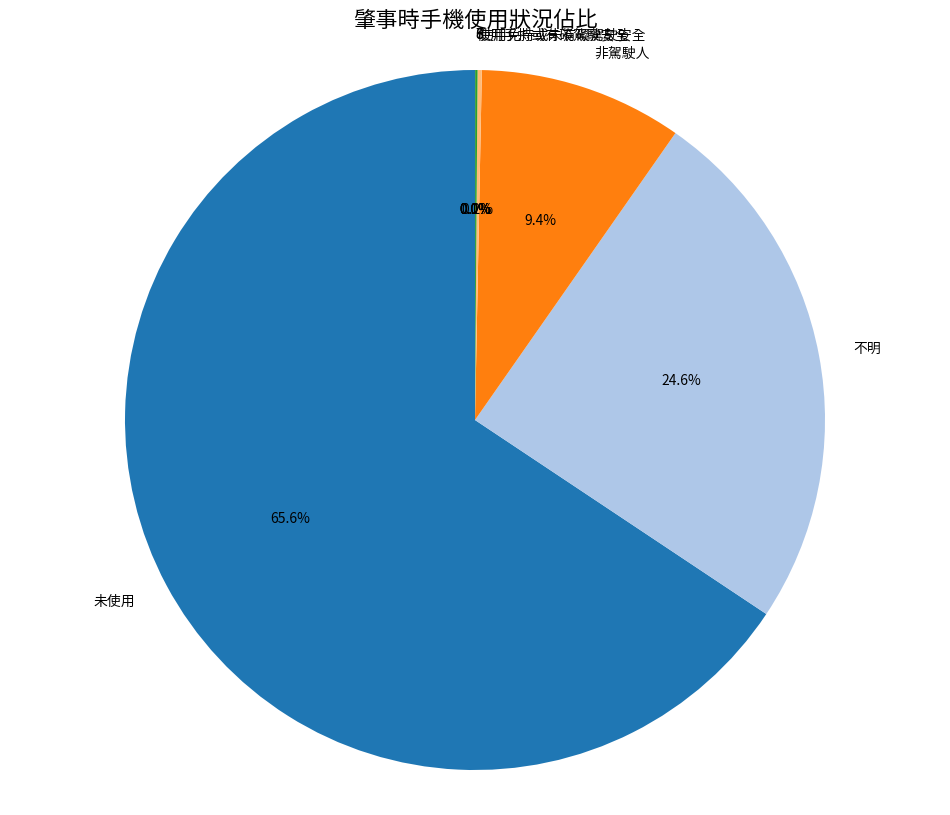

In [ ]:
# 使用手機狀況
situation_transform = {"1":"未使用",
  "2":"使用手持或有礙駕駛安全",
  "3":"使用免持或未有礙駕駛安全",
  "4":"不明",
  "5":"非駕駛人"
}

replace_dict = {}
for label, situations in situation_transform.items():
    for situation in situations:
        replace_dict[str(situation)] = label
phone_data = data["行動電話"].dropna().astype(str) \
    .replace(replace_dict) \
    .value_counts().sort_values(ascending=False)

# print(phone_data)
labels = [situation_transform.get(key, key) for key in phone_data.index]

colors = plt.cm.tab20.colors[:n] + ((0.5, 0.5, 0.5), )
plt.figure(figsize=(12, 10))
plt.pie(
    phone_data,  # 前 n 名及 "其他" 的數據
    labels=labels,  # 使用事故位置及 "其他" 作為標籤
    autopct='%1.1f%%',  # 百分比格式
    startangle=90,  # 從頂部開始繪製
    textprops={'fontsize': 10},  # 設定文字大小
    colors=colors  # 手動指定顏色
)
plt.title(f'肇事時手機使用狀況佔比', fontsize=16)
plt.axis('equal')  # 確保圓形
plt.show()

#這圖表應該沒甚麼用 全部都是不明或未使用

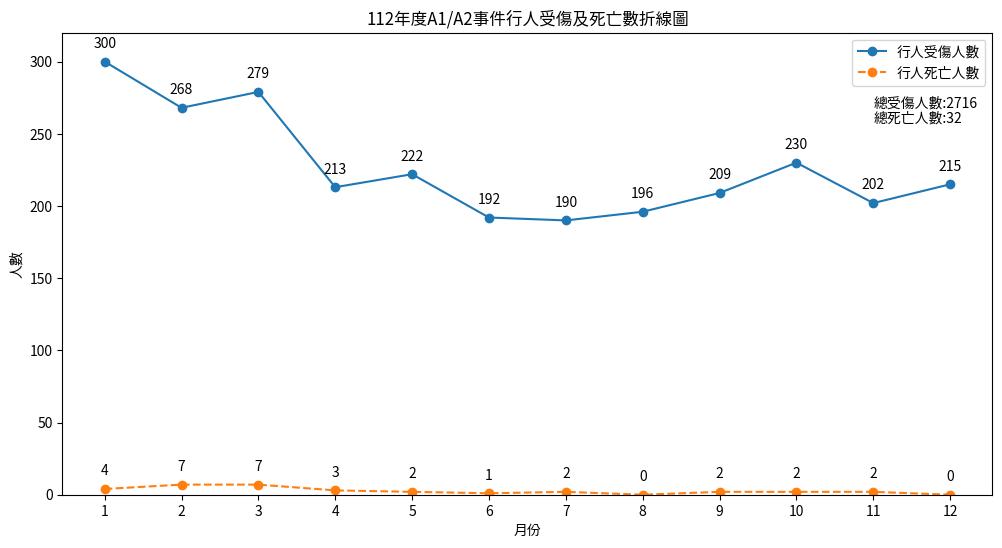

In [ ]:
#行人傷亡數量(使用無去重資料)
data_pedestrian = data[data['車種'] == 'H01']
data_pedestrian = data_pedestrian.astype({'發生月': 'int32', '死亡人數': 'int64', '2-30日死亡人數': 'int64', '受傷人數': 'int64'})
data_pedestrian_count = data_pedestrian.groupby(by=['發生月'])[['受傷人數', '2-30日死亡人數', '死亡人數']].sum()
data_pedestrian_count['死亡人數'] = data_pedestrian_count['死亡人數'].add(data_pedestrian_count['2-30日死亡人數'])
data_pedestrian_count = data_pedestrian_count.drop('2-30日死亡人數', axis=1)
total_pedestrian_count = data_pedestrian_count.sum()

#繪製行人受傷/死亡人數折線圖
plt.figure(figsize=(12, 6))
plt.plot(range(1, 13), data_pedestrian_count['受傷人數'], marker='o', linestyle='-', label='行人受傷人數')
#折線圖每個標點加入數字
i = 1
for data in data_pedestrian_count['受傷人數']:
  plt.annotate(f'{data}', (i, data), textcoords="offset points", xytext=(0, 10), ha='center')
  i += 1

plt.plot(range(1, 13), data_pedestrian_count['死亡人數'], marker='o', linestyle='dashed', label='行人死亡人數')
i = 1
for data in data_pedestrian_count['死亡人數']:
  plt.annotate(f'{data}', (i, data), textcoords="offset points", xytext=(0, 10), ha='center')
  i += 1

#設定圖片標示及標題
plt.legend()
plt.xlabel('月份')
plt.ylabel('人數')
plt.title('112年度A1/A2事件行人受傷及死亡數折線圖')
plt.text(11, 268, f'總受傷人數:{total_pedestrian_count["受傷人數"]}')
plt.text(11, 258, f'總死亡人數:{total_pedestrian_count["死亡人數"]}')

#調整圖片座標軸參數
plt.ylim(0, 320)
plt.xticks(range(1, 13))
plt.show()

        受傷人數  死亡人數
年齡                
0-12歲    163     0
13-17歲    69     0
18-24歲   185     0
25-64歲  1386     8
65歲以上    913    24


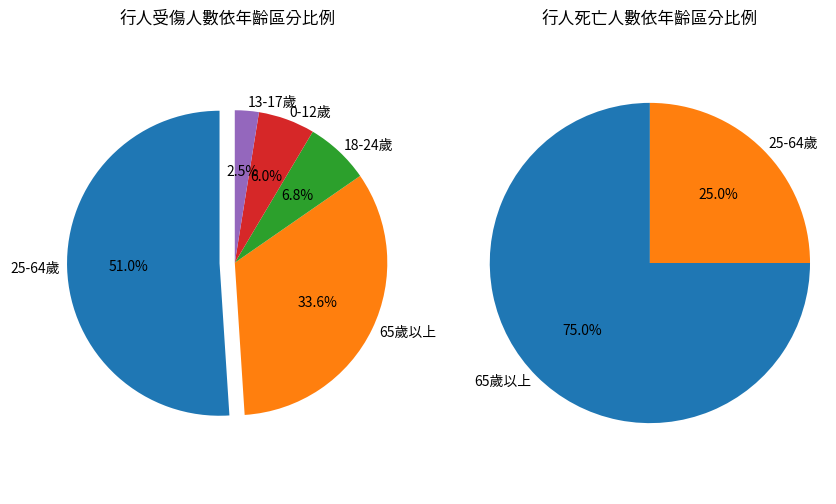

In [ ]:
age_intervals = {
  '0-12歲': list(range(0, 13)),
  '13-17歲': list(range(13, 18)),
  '18-24歲': list(range(18, 25)),
  '25-64歲': list(range(25, 65)),
  '65歲以上': list(range(65, 112))
}
replace_dict = {}
for label, ages in age_intervals.items():
  for age in ages:
    replace_dict[str(age)] = label

#age mapping
data_pedestrian["年齡"] = data_pedestrian["年齡"].dropna().astype(str) \
  .replace(replace_dict)
data_pedestrian_count_by_age = data_pedestrian.groupby(by=['年齡'])[['受傷人數', '2-30日死亡人數', '死亡人數']].sum()
data_pedestrian_count_by_age['死亡人數'] = data_pedestrian_count_by_age['死亡人數'].add(data_pedestrian_count_by_age['2-30日死亡人數'])
data_pedestrian_count_by_age = data_pedestrian_count_by_age.drop('2-30日死亡人數', axis=1)
print(data_pedestrian_count_by_age)

explode=(0.1, 0, 0, 0, 0)
fig = plt.figure(figsize=(10, 6))
data_sort_by_hurt = data_pedestrian_count_by_age.sort_values(by='受傷人數', ascending=False)
ax1 = fig.add_subplot(121)
ax1.pie(data_sort_by_hurt['受傷人數'], labels=data_sort_by_hurt.index, autopct='%1.1f%%', startangle=90, labeldistance=1.05, explode=explode)
ax1.set_title('行人受傷人數依年齡區分比例')
ax1.set_ylabel('')
ax1.axis('equal')

data_sort_by_death = data_pedestrian_count_by_age.sort_values(by='死亡人數', ascending=False)
data_sort_by_death = data_sort_by_death.loc[(data_sort_by_death['死亡人數']!=0)]
ax2 = fig.add_subplot(122)
ax2.pie(data_sort_by_death['死亡人數'], labels=data_sort_by_death.index, autopct='%1.1f%%', startangle=90, labeldistance=1.05)
ax2.set_title('行人死亡人數依年齡區分比例')
ax2.set_ylabel('')
ax2.axis('equal')
plt.show()